In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taylor-swift-song-lyrics-from-all-the-albums/taylor_swift_lyrics.csv


In [2]:
file="../input/taylor-swift-song-lyrics-from-all-the-albums/taylor_swift_lyrics.csv"

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [4]:
swift=pd.read_csv("../input/taylor-swift-song-lyrics-from-all-the-albums/taylor_swift_lyrics.csv",encoding = 'ISO-8859-1')

In [5]:
swift.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [6]:
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [7]:
swift['track_title'].value_counts()

End Game (Ft. Ed Sheeran & Future)    101
I Wish You Would                      83 
Blank Space                           83 
Enchanted                             80 
Delicate                              78 
                                      .. 
Holy Ground                           30 
A Place In This World                 27 
Cold as You                           24 
A Perfectly Good Heart                23 
Sad Beautiful Tragic                  22 
Name: track_title, Length: 94, dtype: int64

In [8]:
swift[['lyric']]

,lyric
0,He said the way my blue eyes shined
1,Put those Georgia stars to shame that night
2,"I said, ""That's a lie"""
3,Just a boy in a Chevy truck
4,That had a tendency of gettin' stuck
...,...
4857,"(Hold on to the memories, they will hold on to you)"
4858,Please don't ever become a stranger
4859,"(Hold on to the memories, they will hold on to you)"
4860,Whose laugh I could recognize anywhere


In [9]:
def processFirstLine(lyrics, songID, songName, row):
    lyrics.append(row['lyric'] + '\n')
    songID.append( row['year']*100+ row['track_n'])
    songName.append(row['track_title'])
    return lyrics,songID,songName

In [10]:
# define empty lists for the lyrics , songID , songName 
lyrics = []
songID = []
songName = []

# songNumber indicates the song number in the dataset
songNumber = 1

# i indicates the song number
i = 0
isFirstLine = True

# Iterate through every lyrics line and join them together for each song independently 
for index,row in swift.iterrows():
    if(songNumber == row['track_n']):
        if (isFirstLine):
            lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
            isFirstLine = False
        else :
            #if we still in the same song , keep joining the lyrics lines    
            lyrics[i] +=  row['lyric'] + '\n'
    #When it's done joining a song's lyrics lines , go to the next song :    
    else :
        lyrics,songID,songName = processFirstLine(lyrics,songID,songName,row)
        songNumber = row['track_n']
        i+=1


In [11]:
lyrics_data = pd.DataFrame({'songID':songID, 'songName':songName, 'lyrics':lyrics })

In [12]:
lyrics_data.head()

,songID,songName,lyrics
0,200601,Tim McGraw,"He said the way my blue eyes shined\nPut those Georgia stars to shame that night\nI said, ""That's a lie""\nJust a boy in a Chevy truck\nThat had a tendency of gettin' stuck\nOn backroads at night\nAnd I was right there beside him all summer long\nAnd then the time we woke up to find that summer gone\nBut when you think Tim McGraw\nI hope you think my favorite song\nThe one we danced to all night long\nThe moon like a spotlight on the lake\nWhen you think happiness\nI hope you think that little black dress\nThink of my head on your chest\nAnd my old faded blue jeans\nWhen you think Tim McGraw\nI hope you think of me\nSeptember saw a month of tears\nAnd thankin' God that you weren't here\nTo see me like that\nBut in a box beneath my bed\nIs a letter that you never read\nFrom three summers back\nIt's hard not to find it all a little bittersweet\nAnd lookin' back on all of that, it's nice to believe\nWhen you think Tim McGraw\nI hope you think my favorite song\nThe one we danced to all night long\nThe moon like a spotlight on the lake\nWhen you think happiness\nI hope you think that little black dress\nThink of my head on your chest\nAnd my old faded blue jeans\nWhen you think Tim McGraw\nI hope you think of me\nAnd I'm back for the first time since then\nI'm standin' on your street\nAnd there's a letter left on your doorstep\nAnd the first thing that you'll read is:\n""When you think Tim McGraw\nI hope you think my favorite song\nSomeday you'll turn your radio on\nI hope it takes you back to that place""\nWhen you think happiness\nI hope you think that little black dress\nThink of my head on your chest\nAnd my old faded blue jeans\nWhen you think Tim McGraw\nI hope you think of me\nOh, think of me\nMmmm\nHe said the way my blue eyes shine\nPut those Georgia stars to shame that night\nI said, ""That's a lie""\n"
1,200602,Picture To Burn,"State the obvious, I didn't get my perfect fantasy\nI realize you love yourself more than you could ever love me\nSo go and tell your friends that I'm obsessive and crazy\nThat's fine, I'll tell mine that you're gay\nBy the way\nI hate that stupid old pickup truck\nYou never let me drive\nYou're a redneck heartbreak\nWho's really bad at lying\nSo watch me strike a match\nOn all my wasted time\nAs far as I'm concerned you're\nJust another picture to burn\nThere's no time for tears\nI'm just sitting here planning my revenge\nThere's nothing stopping me\nFrom going out with all of your best friends\nAnd if you come around saying sorry to me\nMy daddy's gonna show you how sorry you'll be\nI hate that stupid old pickup truck\nYou never let me drive\nYou're a redneck heartbreak\nWho's really bad at lying\nSo watch me strike a match\nOn all my wasted time\nAs far as I'm concerned you're\nJust another picture to burn\nAnd if you're missing me\nYou'd better keep it to yourself\n'Cause coming back around here\nWould be bad for your health\nCause I hate that stupid old pickup truck\nYou never let me drive\nYou're a redneck heartbreak\nWho's really bad at lying\nSo watch me strike a match\nOn all my wasted time\nIn case you haven't heard\nI really really hate that\nI hate that stupid old pickup truck\nYou never let me drive\nYou're a redneck heartbreak\nWho's really bad at lying\nSo watch me strike a match\nOn all my wasted time\nAs far as I'm concerned you're\nJust another picture to burn\nBurn, burn, burn, baby, burn\nYou're just another picture to burn\nBaby, burn\n"
2,200603,Teardrops On My Guitar,"Drew looks at me\nI fake a smile so he won't see\nThat I want and I'm needing\nEverything that we should be\nI'll bet she's beautiful, that girl he talks about\nAnd she's got everything that I have to live without\nDrew talks to me\nI laugh 'cause it's so damn funny\nThat I can't even see\nAnyone when he's with me\nHe says he's so in love, he's finally got it right\nI wonder if he knows he's all I think about at night\nHe's the reason for the teardrops on my guitar\

In [13]:
lyricsText =''
for listitem in lyrics:
    lyricsText += listitem

In [14]:
lyricsText

'He said the way my blue eyes shined\nPut those Georgia stars to shame that night\nI said, "That\'s a lie"\nJust a boy in a Chevy truck\nThat had a tendency of gettin\' stuck\nOn backroads at night\nAnd I was right there beside him all summer long\nAnd then the time we woke up to find that summer gone\nBut when you think Tim McGraw\nI hope you think my favorite song\nThe one we danced to all night long\nThe moon like a spotlight on the lake\nWhen you think happiness\nI hope you think that little black dress\nThink of my head on your chest\nAnd my old faded blue jeans\nWhen you think Tim McGraw\nI hope you think of me\nSeptember saw a month of tears\nAnd thankin\' God that you weren\'t here\nTo see me like that\nBut in a box beneath my bed\nIs a letter that you never read\nFrom three summers back\nIt\'s hard not to find it all a little bittersweet\nAnd lookin\' back on all of that, it\'s nice to believe\nWhen you think Tim McGraw\nI hope you think my favorite song\nThe one we danced to 

In [15]:
raw_text = lyricsText
raw_text = raw_text.lower().split("\n")

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [17]:
tokenizer = Tokenizer()

In [18]:
tokenizer.fit_on_texts(raw_text)
total_words = len(tokenizer.word_index) + 1

In [19]:
total_words

2408

In [20]:
input_sequences = []
for line in raw_text:
    print(line)
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)




he said the way my blue eyes shined
put those georgia stars to shame that night
i said, "that's a lie"
just a boy in a chevy truck
that had a tendency of gettin' stuck
on backroads at night
and i was right there beside him all summer long
and then the time we woke up to find that summer gone
but when you think tim mcgraw
i hope you think my favorite song
the one we danced to all night long
the moon like a spotlight on the lake
when you think happiness
i hope you think that little black dress
think of my head on your chest
and my old faded blue jeans
when you think tim mcgraw
i hope you think of me
september saw a month of tears
and thankin' god that you weren't here
to see me like that
but in a box beneath my bed
is a letter that you never read
from three summers back
it's hard not to find it all a little bittersweet
and lookin' back on all of that, it's nice to believe
when you think tim mcgraw
i hope you think my favorite song
the one we danced to all night long
the moon like a spotl

In [21]:
input_sequences

[[61, 58],
 [61, 58, 3],
 [61, 58, 3, 86],
 [61, 58, 3, 86, 10],
 [61, 58, 3, 86, 10, 318],
 [61, 58, 3, 86, 10, 318, 115],
 [61, 58, 3, 86, 10, 318, 115, 604],
 [194, 263],
 [194, 263, 1117],
 [194, 263, 1117, 605],
 [194, 263, 1117, 605, 5],
 [194, 263, 1117, 605, 5, 410],
 [194, 263, 1117, 605, 5, 410, 16],
 [194, 263, 1117, 605, 5, 410, 16, 84],
 [2, 58],
 [2, 58, 99],
 [2, 58, 99, 8],
 [2, 58, 99, 8, 769],
 [34, 8],
 [34, 8, 474],
 [34, 8, 474, 9],
 [34, 8, 474, 9, 8],
 [34, 8, 474, 9, 8, 1472],
 [34, 8, 474, 9, 8, 1472, 606],
 [16, 62],
 [16, 62, 8],
 [16, 62, 8, 1473],
 [16, 62, 8, 1473, 13],
 [16, 62, 8, 1473, 13, 1118],
 [16, 62, 8, 1473, 13, 1118, 1474],
 [21, 1475],
 [21, 1475, 43],
 [21, 1475, 43, 84],
 [4, 2],
 [4, 2, 27],
 [4, 2, 27, 90],
 [4, 2, 27, 90, 80],
 [4, 2, 27, 90, 80, 1476],
 [4, 2, 27, 90, 80, 1476, 135],
 [4, 2, 27, 90, 80, 1476, 135, 14],
 [4, 2, 27, 90, 80, 1476, 135, 14, 607],
 [4, 2, 27, 90, 80, 1476, 135, 14, 607, 120],
 [4, 138],
 [4, 138, 3],
 [4, 138,

In [22]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [23]:
input_sequences

array([[  0,   0,   0, ...,   0,  61,  58],
       [  0,   0,   0, ...,  61,  58,   3],
       [  0,   0,   0, ...,  58,   3,  86],
       ...,
       [  0,   0,   0, ..., 118, 153,  21],
       [  0,   0,   0, ..., 153,  21,   5],
       [  0,   0,   0, ...,  21,   5,   1]], dtype=int32)

In [24]:
predictors

array([[  0,   0,   0, ...,   0,   0,  61],
       [  0,   0,   0, ...,   0,  61,  58],
       [  0,   0,   0, ...,  61,  58,   3],
       ...,
       [  0,   0,   0, ...,   2, 118, 153],
       [  0,   0,   0, ..., 118, 153,  21],
       [  0,   0,   0, ..., 153,  21,   5]], dtype=int32)

In [25]:
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 17, 100)           240800    
_________________________________________________________________
bidirectional (Bidirectional (None, 17, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 17, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1204)              121604    
_________________________________________________________________
dense_1 (Dense)              (None, 2408)              2901640   
Total params: 3,725,644
Trainable params: 3,725,644
Non-trainable params: 0
______________________________________________

In [27]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
957/957 [==============================] - 12s 13ms/step - loss: 6.0521 - accuracy: 0.0493
Epoch 2/100
957/957 [==============================] - 11s 11ms/step - loss: 5.5590 - accuracy: 0.0600
Epoch 3/100
957/957 [==============================] - 10s 11ms/step - loss: 5.3104 - accuracy: 0.0704
Epoch 4/100
957/957 [==============================] - 10s 11ms/step - loss: 5.1131 - accuracy: 0.0896
Epoch 5/100
957/957 [==============================] - 10s 11ms/step - loss: 4.9171 - accuracy: 0.1138
Epoch 6/100
957/957 [==============================] - 11s 11ms/step - loss: 4.7570 - accuracy: 0.1328
Epoch 7/100
957/957 [==============================] - 11s 12ms/step - loss: 4.6097 - accuracy: 0.1495
Epoch 8/100
957/957 [==============================] - 10s 11ms/step - loss: 4.4855 - accuracy: 0.1693
Epoch 9/100
957/957 [==============================] - 10s 11ms/step - loss: 4.3738 - accuracy: 0.1815
Epoch 10/100
957/957 [==============================] - 10s 11ms/step - l

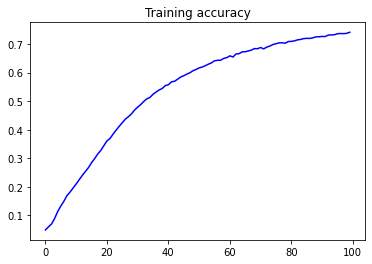

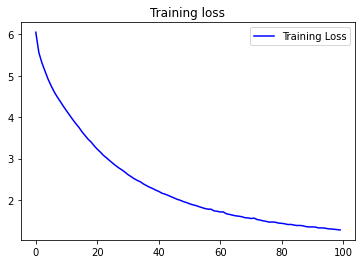

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [29]:
seed_text = "Drew "
next_words = 50
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Drew  looks at me you got a girl at home here now now i'm standing there in his car last last night in new york last kings tied hands haa whole bad bad white damn well love new water joke new very clear ah clear oh love cut new water way
